# Logistic Regression - Weather Dataset

In this notebook I will analyse the Australian Weather Dataset and build a Logistic Regression classifier to predict whether it will rain or not tomorrow.

## Contents
1. [Introduction to Logistic Regression](#s1)
2. [Logistic Regression Intuition](#s2)
3. [Logistic Regression Assumptions](#s3)
4. [Types of Logistic Regression](#s4)
5. [Exploratory Data Analysis](#s5)
6. [Feature Engineering](#s6)
7. [Model Training](#s7)
8. [Model Evaluation](#s8)
7. [Hyperparameter Tuning](#s9)

## 1. Introduction to Logistic Regression <a class="anchor" id="s1"></a>

Logistic regression is a fundamental statistical method used for binary classification tasks, where the goal is to predict the probability of a sample belonging to a particular class. Despite its name, it's a classification algorithm rather than a regression one.

## 2. Logistic Regression Intuition <a id='s2'></a>

The main idea behined the log odds (logit) function is to transform a probability value between 0 and 1 into a value between negative and positive infinity. This transformation allows us to have a linear relationship between predictor variables and the log odds of the event occuring.

### Odds Ratio, Log Odds (Logit function)

The logit function formula is :
    
     logit(p) = ln(p/(1-p)) 
    
- p represents probability of event occurring.

The logit function takes the probability of success (p) and transforms it using the natural logarithm. This transformation maps the probability to a log-odds scale, where the log-odds represent the logarithm of the odds of success. The odds themselves are the ratio of the probability of success (p) to the probability of failure (1−p). 

### Linear relationship between Log Odds and Predictor Variables

The log odds (logit-transformed values) can then be related to the predictor variables using linear regression techniques. In logistic regression, the logit function is used to model the linear relationship between the predictors and the log-odds of the binary outcome. 

logit(p) = B1\*X1 + B2\*X2 + .. + Bn\*Xn

The coefficients obtained from the resulting Logistic Regression model can be interpreted to understand the impact of each predictor on the log-odds (logit) of the event occurring.

### Making Predictions

Predictions can be made by applying the inverse of the logit function (called the logistic function or sigmoid function) to the linear combination of predictor variables and their coefficients. 

Sigmoid Function: 

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)
    
 - z represents linear combination of predictor variables and their coefficients.

This function maps the linear combination back to a probability between 0 and 1, allowing us to predict the probability of the event occurring for a given set of predictor variable values.

Once we have the predicted probability of an event occurring we need to relate it to a binary outcome (true or false). For this we select a decision boundary (value between 0 and 1), and say probability values greater than the boundary value are mapped to "true" and values less than the boundary values are mapped to "false".

p ≥ Decision Boundary => class = 1 (True)

p < Decision Boundary => class = 0 (False)

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## 3. Logistic Regression Assumptions <a id='s3'></a>

1. **Binary Logistic Regression**: The dependent variable should be binary, meaning it has two possible outcomes.

2. **Independence of Observations**: The observations in the dataset should be independent of each other. This assumption is crucial because logistic regression assumes that the observations are independent of each other.

3. **Linearity of Independent Variables and Log Odds**: The relationship between the independent variables and the log odds of the dependent variable should be linear. If the relationship is not linear, the model's predictions might not be accurate.

4. **No Multicollinearity**: The independent variables should not be highly correlated with each other. Multicollinearity can make it difficult for the model to estimate the individual effects of predictors accurately.

5. **Large Sample Size**: While not strictly an assumption, logistic regression tends to perform better with a larger sample size to ensure stability and reliability of estimates.

6. **Absence of Outliers**: Outliers can heavily influence the estimation of the coefficients, potentially impacting the model's accuracy.

7. **No Homoscedasticity Assumption**: Logistic regression does not assume homoscedasticity, unlike linear regression, where the residuals are assumed to have constant variance.

Violations of these assumptions might affect the model's performance and the validity of its predictions. However, logistic regression is known for being relatively robust to violations of assumptions compared to other techniques.

## 4. Types of Logistic Regression <a id='s4'></a>

There are several types of logistic regression techniques based on specific needs and variations:

- **Binary Logistic Regression**: This is the standard form of logistic regression used when the dependent variable has only two possible outcomes (e.g., yes/no, 0/1).

- **Multinomial Logistic Regression**: Used when the dependent variable has more than two categories that are not ordered. It predicts the probabilities of the different categories of the dependent variable.

- **Ordinal Logistic Regression**: Suitable for dependent variables that are ordered or ranked. For instance, categories like low, medium, high, or ordinal ratings.

- **Multivariate Logistic Regression**: It involves multiple dependent variables that are interrelated and predicted by the same set of independent variables.

- **Regularized Logistic Regression**: This includes techniques like L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting by adding penalty terms to the logistic regression equation.

- **Elastic Net Logistic Regression**: Combines both L1 and L2 regularization penalties to balance between variable selection and coefficient shrinkage.

These variations offer flexibility in modeling different types of relationships between variables and handling various kinds of classification problems. Each type has its specific use case and assumptions but I will not go into details here. In our study we will use Binary Logistic Regression.

## Logistic Regression Study Workflow 

Now that we have understood the main ideas behined logistic regression, the next section of the notebook will look at conducing a study using logistic regression. Below is a loose outline of the stages this entails:

1. **Data Collection & Preprocessing:** Gather, clean, and prepare data. Conduct exploratory analysis.
2. **Data Splitting:** Divide into training/testing sets.
3. **Model Building:** Create logistic regression model, train, and evaluate.
4. **Model Improvement:** Scale features, tune parameters for better performance.
5. **Deployment & Interpretation:** Deploy for predictions, interpret feature impact.
6. **Maintenance & Monitoring:** Continuously monitor, adapt to changes.


## 5. Exploratory Data Analysis <a id='s5'></a>

Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often using visual and quantitative methods. The main goal of EDA is to gain a better understanding of the data via visual insights, detecting patterns, spotting anomalies, and testing hypotheses. It's essential first step before applying any formal statistical techniques or building predictive models as it allows you to be fully informed resulting in optimal technique/model selection and tuning.

I will conduct EDA on the categorical and numerical variables independently.

### Categorical Variables

In [1]:
#Import required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

#Import dataset from file.
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [2]:
# Overview of dataset
print(df.info())
print('')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:

categorical_vars = [var for var in df.columns if df[var].dtype == "O"]

#Identify unique dtypes in dataframe
print(f'dtypes: {df.dtypes.unique()}')
print('')

#List categorical variables
print(f'Categorical variables: {categorical_vars}')
print('')

#List categorical variables and number of categories for each
for var in categorical_vars:
    print(f'Variable {var} has {len(df[var].unique())} categories')
print('')

#Display null value value counts for categorical variables.
print('Null value counts:')
print(df[categorical_vars].isnull().sum())
print('')

#List categorical variables categories
for var in categorical_vars:
    print(f'Variable {var} categories: {df[var].unique()}') 
print('')

#Display first 5 rows of df
df.head()

dtypes: [dtype('O') dtype('float64')]

Categorical variables: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Variable Date has 3436 categories
Variable Location has 49 categories
Variable WindGustDir has 17 categories
Variable WindDir9am has 17 categories
Variable WindDir3pm has 17 categories
Variable RainToday has 3 categories
Variable RainTomorrow has 3 categories

Null value counts:
Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Variable Date categories: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Variable Location categories: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'M

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


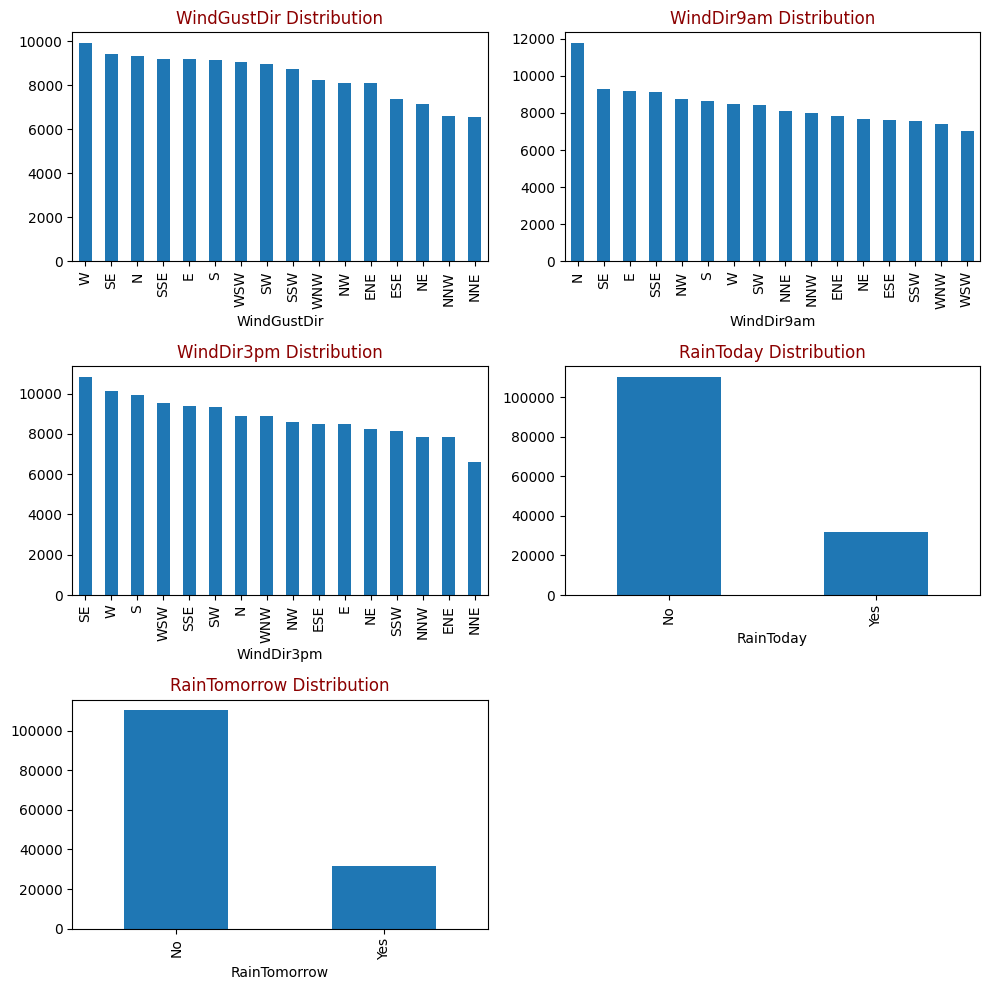

In [4]:
categorical_vars_excl = [x for x in categorical_vars if x not in ['Location', 'Date']]

# Plotting in a grid format with 2 rows
num_plots = len(categorical_vars_excl)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

def draw_frequency_plots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        #dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        counts = df[feature].value_counts()
        counts.plot(kind='bar', ax=ax)
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

draw_frequency_plots(df, categorical_vars_excl, num_rows, num_cols)

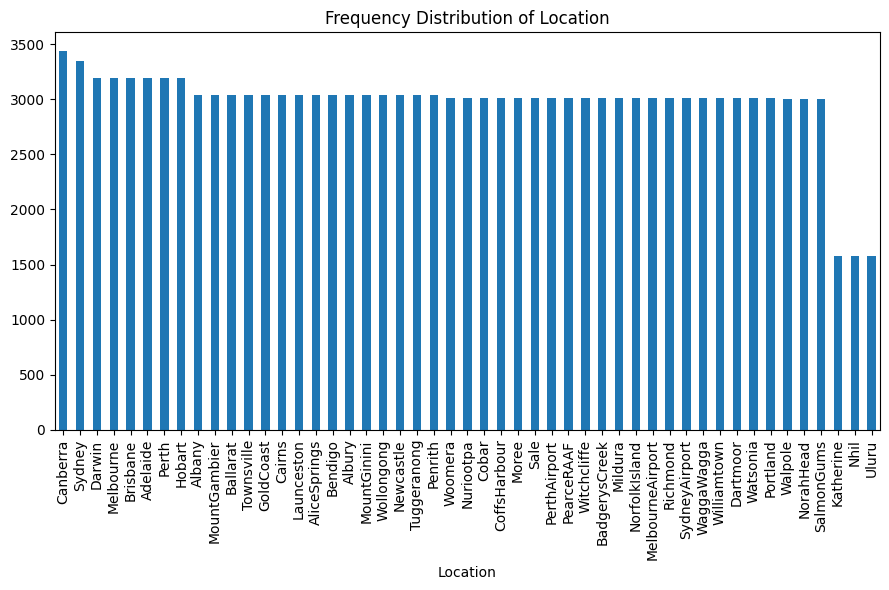

In [5]:
ax = df['Location'].value_counts().plot(kind='bar', 
                                   title=f'Frequency Distribution of Location',
                                   figsize=(9, 6))
plt.tight_layout()


### High Cardinality - A potential issue

High cardinality (variables with many categories) can indeed pose challenges for binary logistic regression, but whether it's an issue depends on various factors. Thus it is important to check for this in the EDA stage.

1. **Computational Complexity:** With a high number of unique values, the logistic regression algorithm might take longer to converge due to the increased computational load.
  
2. **Overfitting:** High cardinality can lead to overfitting, especially if each unique value is treated as a separate feature. This could happen if you're using one-hot encoding or dummy variables for categorical variables with many levels, resulting in a large number of predictors relative to the sample size.
  
3. **Sparsity of Data:** When using one-hot encoding for high cardinality categorical variables, it can result in sparse matrices, meaning many columns will have mostly zeros. This sparsity can impact the efficiency of the logistic regression model.
  
4. **Interpretability:** Having numerous dummy variables can make interpretation more challenging as you're dealing with a large number of coefficients, each corresponding to a specific level of the categorical variable.

To address high cardinality in logistic regression, you might consider:

- **Grouping Categories:** Combine rare or similar categories to reduce the number of unique values.
- **Feature Engineering:** Instead of using raw categorical variables, create meaningful aggregated features.
- **Dimensionality Reduction:** Techniques like PCA (Principal Component Analysis) or feature selection methods can help reduce the number of predictors.

So, while high cardinality itself isn't a problem for logistic regression, it can introduce challenges that need to be managed effectively for the model to perform well.

We will use a general definition for high cardinality of 50 unique categories and evaluate our data based on this.

In [6]:
#List variables with >= 50 categories.
[print(var,len(df[var].unique())) for var in categorical_vars if (len(df[var].unique()) >= 50) ]

Date 3436


[None]

#### Categorical Variables Summary:

We have 7 categorical variables
- Date column contains date values but is of type Object.
- RainToday, RainTomorrow are binary categorical variables.
- Others are multi class categorical variables.
- All variables barring Date, Location have null values.
- All variables have a general uniform distribution shape barring RainToday, RainTomorrow which have a lot more "No" than "Yes" values.
- All categorical variables do not have high cardinality (>50 categories)

### Numerical Variables

In [7]:
numerical_vars = df.columns[~df.columns.isin(categorical_vars)]
print(numerical_vars)
print('')
print(df[numerical_vars].describe())

#note that the df.describe() function does not consider null values when calculating measures.

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  

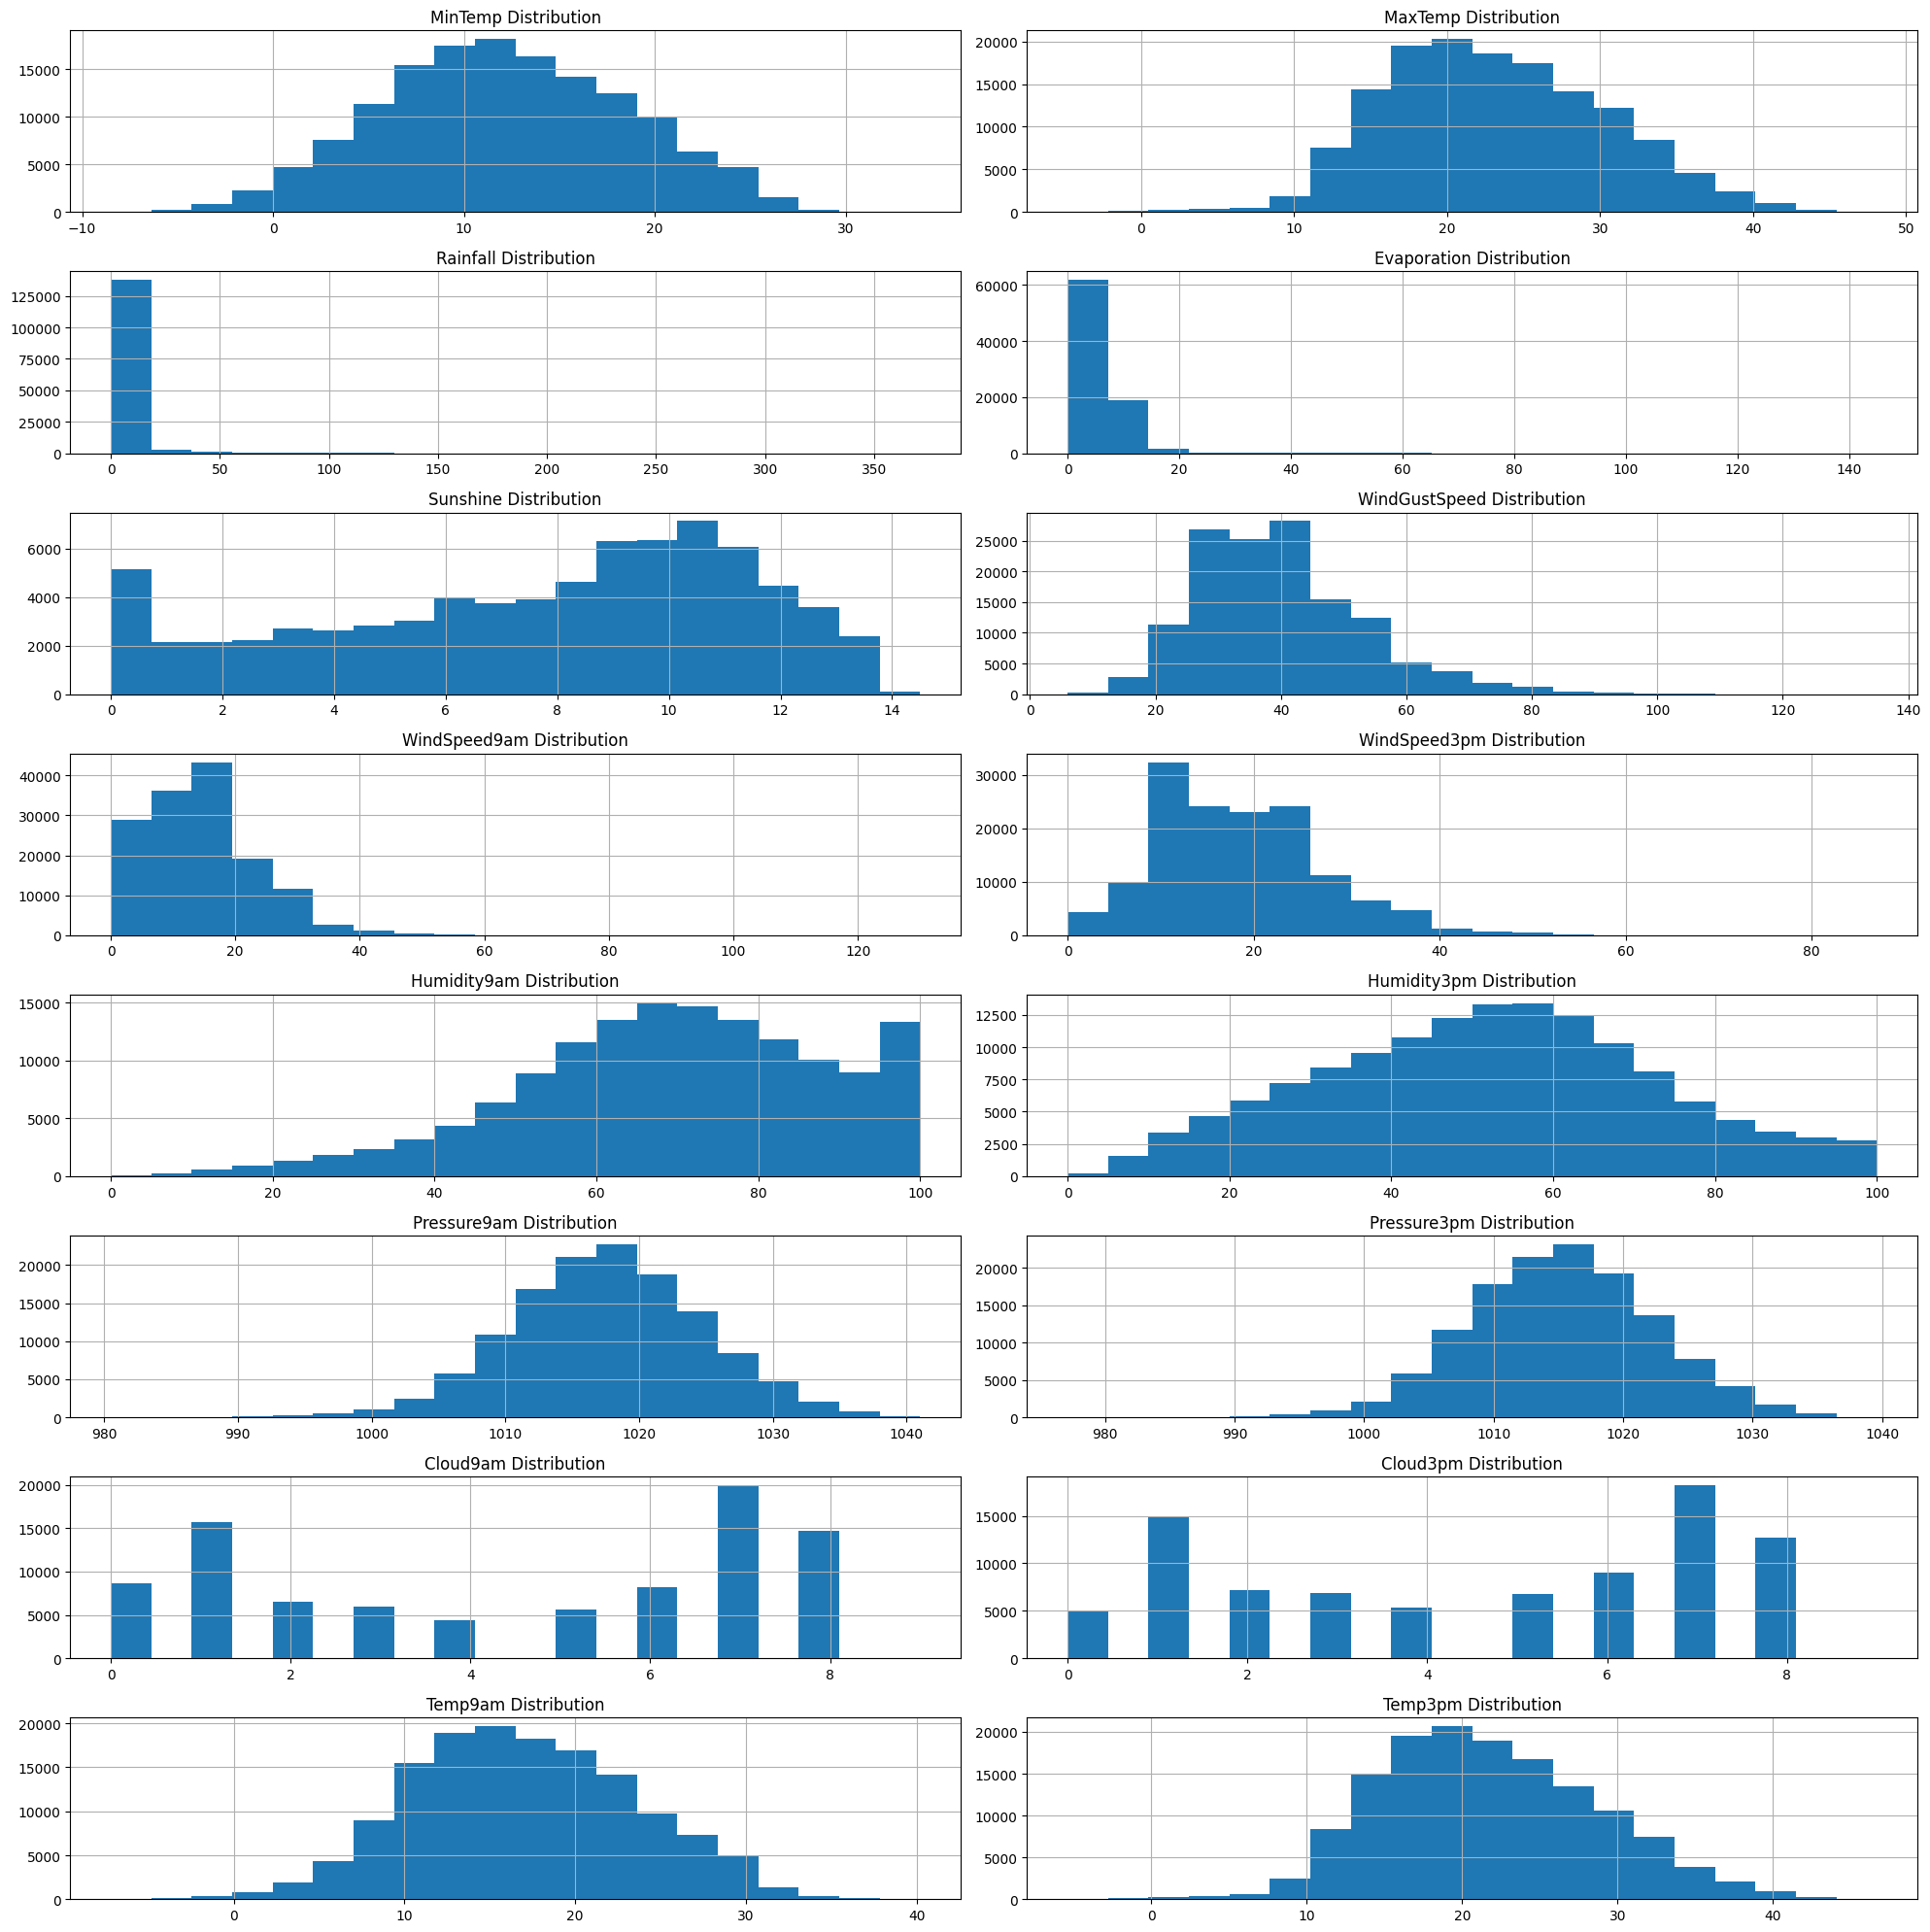

In [8]:
# Plotting in a grid format with 2 rows
num_plots = len(numerical_vars)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution")
        
    fig.tight_layout()  
    plt.show()

draw_histograms(df,numerical_vars, num_rows, num_cols)

### 4. Create Train and Test Splits 

Seperate dataset into training and test sets. This steps should occur before imputation (filling in missing values) or any other preprocessing (feature engineering) as this prevents data leakage and ensure an unbiased evaluation of the model's performance.

Here's why it's important:

1. **Preventing Information Leakage:** Any information gained from the test set during preprocessing might influence the preprocessing decisions. For instance, if imputation, scaling, or feature engineering is done using information from the entire dataset (including the test set), it could inadvertently leak information about the test set into the training process. This compromises the integrity of the test set as a truly independent dataset for evaluation.

2. **Realistic Model Assessment:** By preprocessing the data only based on the training set, you simulate the real-world scenario where a model is trained on historical data and then applied to new, unseen data. This separation ensures that the model is tested on genuinely unseen data, providing a more realistic assessment of its ability to generalize.

3. **Model Generalization:** The purpose of machine learning models is to generalize well to new, unseen data. If preprocessing steps are applied to the entire dataset before splitting, the model might learn features that do not genuinely exist in new data, potentially leading to overfitting and poor generalization.

4. **Unbiased Performance Estimation:** The test set serves as an unbiased evaluation metric to gauge how well the model performs on new data. If preprocessing is done after splitting, the model evaluation on the test set accurately reflects its performance on truly unseen instances.

In essence, separating the preprocessing steps from the data splitting ensures that the model development process remains blind to the test set, preserving its integrity for evaluation. This practice helps maintain the independence of the test set and provides a more reliable measure of how the model will perform on new, unseen data.


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (116368, 22)
Test set shape: (29092, 22)


In [10]:
# Drop rows where the target variable is null.
X_train = X_train[y_train.isnull() == False]
X_test = X_test[y_test.isnull() == False]

y_train = y_train[y_train.isnull() == False]
y_test = y_test[y_test.isnull() == False]

## 6. Feature Engineering <a id='s6'></a>

Feature engineering is the process of creating new features or transforming existing features in your data to improve the performance of machine learning models. It involves selecting and crafting the right input variables to help the model learn patterns effectively leveraging insights/understanding gained in the EDA stage. Steps typically involved in feature engineering are:

1. **Understanding the Data**: Gain insights into your dataset, its structure, relationships between variables, and domain knowledge. This understanding helps in creating meaningful features.

2. **Handling Missing Values**: Decide on strategies to handle missing data, either by imputing them with mean, median, or mode values or using more advanced techniques like interpolation or predictive imputation.

3. **Feature Selection**: Identify the most relevant features. Use techniques like correlation analysis, feature importance from models, or domain knowledge to select the most impactful features.

4. **Encoding Categorical Variables**: Convert categorical variables into numerical format that machine learning models can understand. Techniques include one-hot encoding, label encoding, or binary encoding.

5. **Creating New Features**: Derive new features from existing ones. For example, extracting date information from timestamps, creating interaction terms, or combining features in meaningful ways.

6. **Scaling and Normalization**: Scale features to a similar range to prevent certain features from dominating others. Techniques like standardization (mean centering and scaling to unit variance) or min-max scaling (scaling to a range) are common.

7. **Dimensionality Reduction**: If the dataset has high dimensionality, consider using techniques like Principal Component Analysis (PCA) or t-SNE to reduce the number of features while preserving essential information.

8. **Handling Skewed Data**: For data that's highly skewed or doesn’t follow a normal distribution, transformations like log transformations or box-cox transformations can make it more Gaussian-like.

9. **Regularization**: In some cases, applying regularization techniques like L1 (Lasso) or L2 (Ridge) regularization during model training can also help in feature selection and model performance.

10. **Feature Testing**: Continuously test and validate the engineered features with your models to assess their impact on performance. Iterate and refine the features based on model performance.

Feature engineering is as much an art as it is a science. It requires experimentation, domain knowledge, and a deep understanding of the data to create features that effectively represent the underlying patterns for the machine learning models.


#### Handling Missing Values - Categorical Variables

There are several strategies to handle missing values in categorical variables for logistic regression:

1. **Mode Imputation**: Replace missing values with the mode (most frequent value) of the categorical variable. This method is simple and quick but might not capture the true variability of the data.

2. **Create a New Category**: Introduce a new category specifically for missing values. This allows the model to recognize and account for missingness explicitly.

3. **Predictive Imputation**: Use predictive models like decision trees, k-nearest neighbors, or even logistic regression itself to predict missing categorical values based on other variables. This method captures relationships between variables but might introduce some bias.

4. **Probabilistic Imputation**: Assign probabilities to each category and sample from these probabilities to fill in missing values. For instance, you can use the distribution of existing categories to assign probabilities to the missing category.

5. **Weight of Evidence (WOE) Encoding**: Replace missing values with a separate category or impute them based on the weight of evidence of different categories within the variable. This technique is particularly useful for credit scoring models.

When selecting a method, it's crucial to consider the nature of the data, the extent of missingness, and the potential impact on the model's performance.  No single method fits all scenarios, so experimentation and evaluation of different approaches are crucial to determine the most suitable method.

Additionally, some software packages or libraries might offer specific functions or methods tailored for handling missing values in categorical variables.



In [11]:
#We will use ordinal encoding as this preserves the meaningful order of day, month, and year features.
for dataframe in [X_train, X_test]:
    dataframe['Date'] = pd.to_datetime(df['Date'])
    dataframe['Year'] = dataframe['Date'].dt.year
    dataframe['Month'] = dataframe['Date'].dt.month
    dataframe['Day'] = dataframe['Date'].dt.day
    dataframe.drop('Date', axis=1, inplace = True)
    
print(X_train.info())
print('')
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 113745 entries, 22926 to 43567
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       113745 non-null  object 
 1   MinTemp        113242 non-null  float64
 2   MaxTemp        113488 non-null  float64
 3   Rainfall       112617 non-null  float64
 4   Evaporation    64950 non-null   float64
 5   Sunshine       59463 non-null   float64
 6   WindGustDir    106279 non-null  object 
 7   WindGustSpeed  106329 non-null  float64
 8   WindDir9am     105743 non-null  object 
 9   WindDir3pm     110738 non-null  object 
 10  WindSpeed9am   112670 non-null  float64
 11  WindSpeed3pm   111643 non-null  float64
 12  Humidity9am    112301 non-null  float64
 13  Humidity3pm    110872 non-null  float64
 14  Pressure9am    102505 non-null  float64
 15  Pressure3pm    102531 non-null  float64
 16  Cloud9am       70752 non-null   float64
 17  Cloud3pm       68018 non-null  

In [12]:
# Resassign variable to get updated list.
categorical_vars = [col for col in X_train.columns if X_train[col].dtypes == 'O']
print(categorical_vars)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [13]:
print('Categorical variable null value counts:')
print(X_train[categorical_vars].isnull().sum())
print('')
print('Categorical variable null value percentages:')
print(X_train[categorical_vars].isnull().mean())

Categorical variable null value counts:
Location          0
WindGustDir    7466
WindDir9am     8002
WindDir3pm     3007
RainToday      1128
dtype: int64

Categorical variable null value percentages:
Location       0.000000
WindGustDir    0.065638
WindDir9am     0.070350
WindDir3pm     0.026436
RainToday      0.009917
dtype: float64


We will use mode imputation to fill our missing values.

In [14]:
#for dataframe in [X_train, X_test]:
#    for var in categorical_vars:
#        dataframe[var].fillna(X_train[var].mode()[0], inplace=True)

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [15]:
print('X_train null values:')
print(X_train[categorical_vars].isnull().sum())
print('')
print('X_test null values:')
print(X_test[categorical_vars].isnull().sum())

X_train null values:
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

X_test null values:
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


In [16]:
X_train[categorical_vars].describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,113745,113745,113745,113745,113745
unique,49,16,16,16,2
top,Canberra,W,N,SE,No
freq,2738,15197,17153,11568,88528


#### Handling Missing Values - Numerical Variables

Handling missing values in numerical variables for logistic regression involves a few strategies:

1. **Imputation**: Replace missing values with a statistic like the mean, median, or mode of the non-missing values in that variable. This helps to retain the data's integrity and prevent loss of information. You can use the mean for normally distributed data and median for skewed distributions.

2. **Prediction**: Use other variables to predict the missing values. You can create a model to predict the missing values based on other variables and then replace them accordingly. This could be a linear regression model or another suitable method.

3. **Deletion**: If the missing values are minimal and randomly distributed, removing those data points might not significantly impact the model's performance. However, this approach should be used cautiously as it may lead to loss of valuable information.

4. **Advanced Imputation Techniques**: Techniques like k-nearest neighbors (KNN) or multiple imputation methods can be employed to estimate missing values based on similarities between data points or imputing multiple plausible values for each missing value.

5. **Flagging**: Another method is to create a new binary variable to indicate whether the value was missing or not. This way, the missingness itself becomes a feature that the model can learn from.

The choice of method often depends on the amount of missing data, the nature of the dataset, and the impact of missingness on the analysis. It's also important to analyze whether the missingness is completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR) as this can influence the choice of handling missing values.


In [17]:
numerical_vars = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [18]:
print('X_train Numerical variable null value counts:')
print(X_train[numerical_vars].isnull().sum())
print('')
print('X_train Numerical variable null value percentages:')
print(X_train[numerical_vars].isnull().mean()*100)
print('')
print('X_test Numerical variable null value counts:')
print(X_test[numerical_vars].isnull().sum())
print('')
print('X_test Numerical variable null value percentages:')
print(X_test[numerical_vars].isnull().mean()*100)

X_train Numerical variable null value counts:
MinTemp            503
MaxTemp            257
Rainfall          1128
Evaporation      48795
Sunshine         54282
WindGustSpeed     7416
WindSpeed9am      1075
WindSpeed3pm      2102
Humidity9am       1444
Humidity3pm       2873
Pressure9am      11240
Pressure3pm      11214
Cloud9am         42993
Cloud3pm         45727
Temp9am            724
Temp3pm           2150
Year                 0
Month                0
Day                  0
dtype: int64

X_train Numerical variable null value percentages:
MinTemp           0.442217
MaxTemp           0.225944
Rainfall          0.991692
Evaporation      42.898589
Sunshine         47.722537
WindGustSpeed     6.519847
WindSpeed9am      0.945096
WindSpeed3pm      1.847993
Humidity9am       1.269506
Humidity3pm       2.525825
Pressure9am       9.881753
Pressure3pm       9.858895
Cloud9am         37.797705
Cloud3pm         40.201328
Temp9am           0.636511
Temp3pm           1.890193
Year              0.

In [19]:
def plot_boxplot(numerical_vars):
    # Plotting in a grid format with 2 rows
    num_plots = len(numerical_vars)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols

    fig=plt.figure(figsize=(10,30))

    for i, feature in enumerate(numerical_vars):
        ax=fig.add_subplot(num_rows,num_cols,i+1)
        df[feature].plot(kind='box')
        ax.set_title(feature+" box plot")

    fig.tight_layout()  
    plt.show()

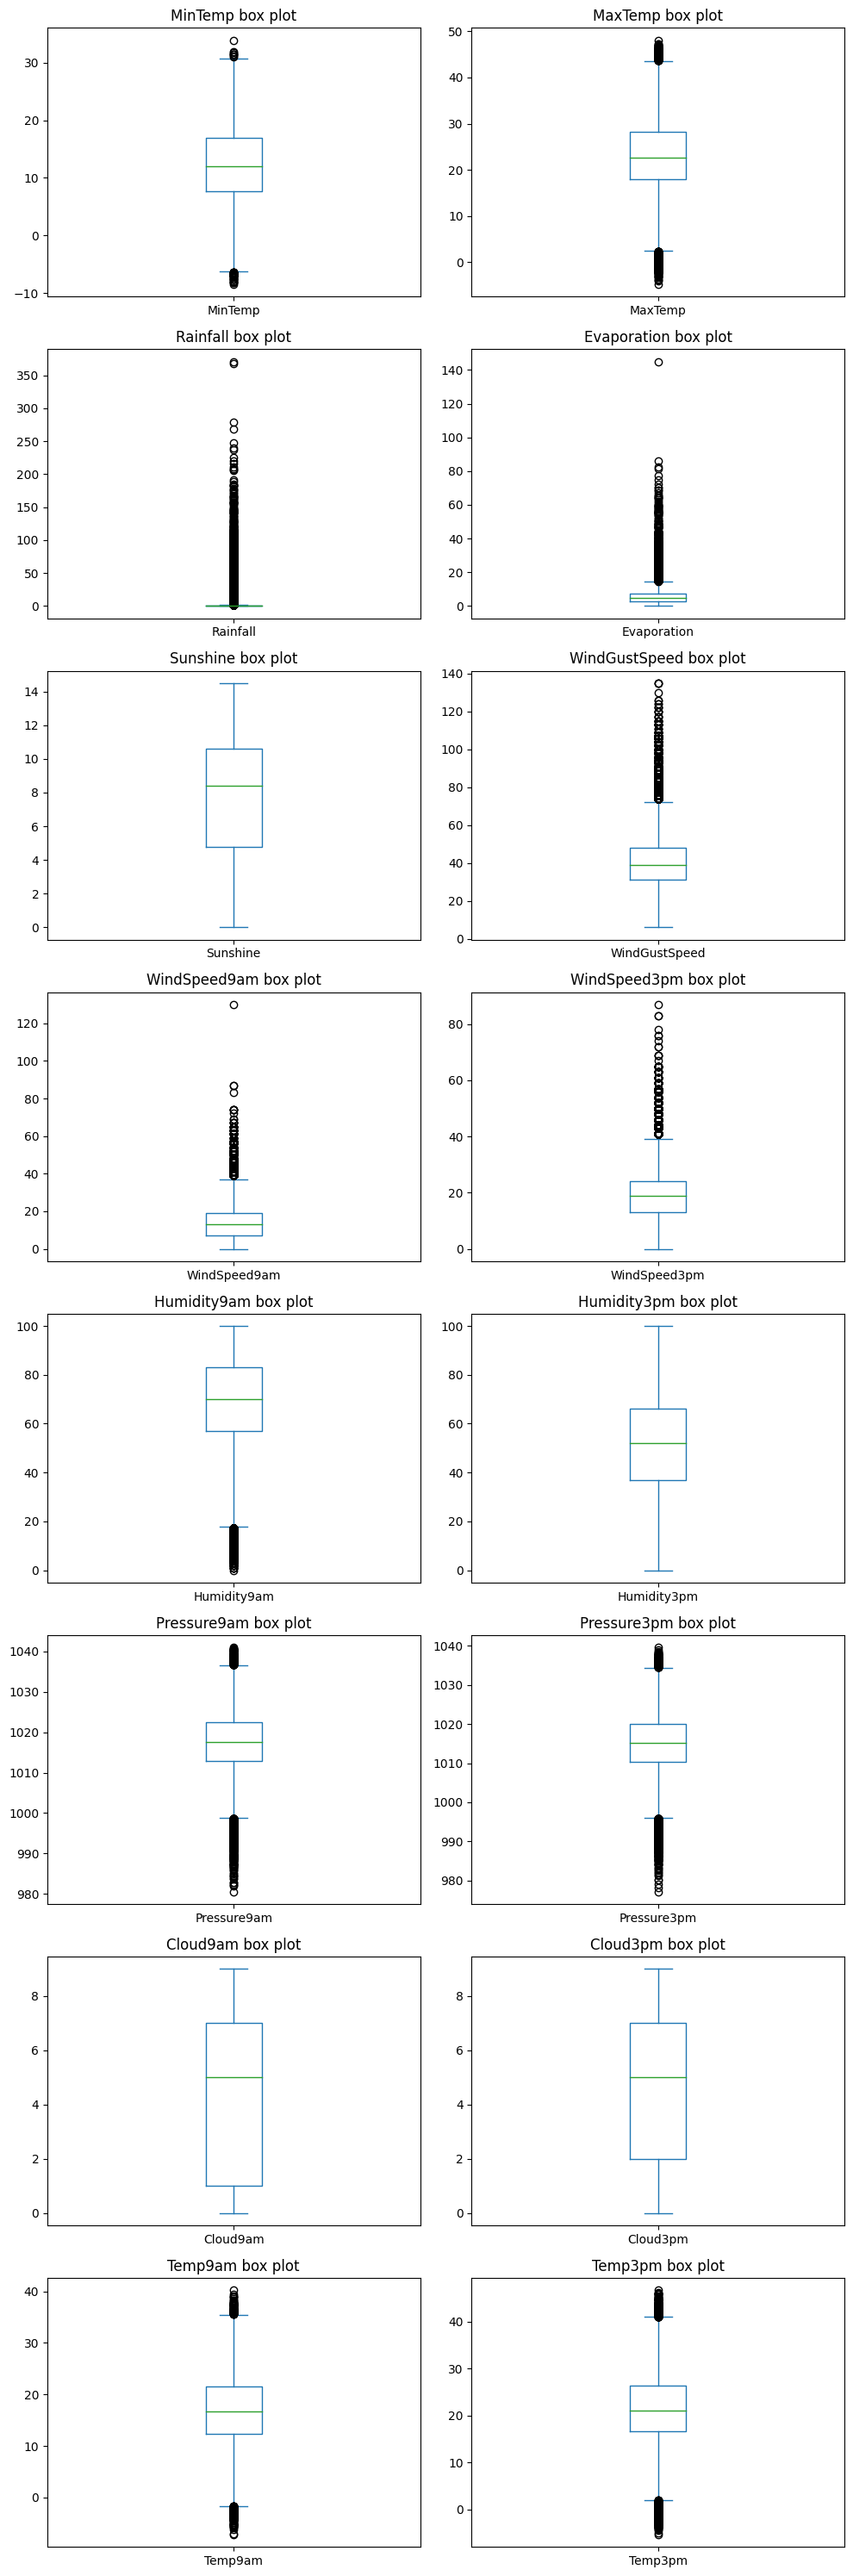

In [20]:
# plot distributions for numerical features excl date features.
plot_boxplot([var for var in numerical_vars if var not in ['Year', 'Month', 'Day']])

We assume that our missing data is completely at random (MCAR). Looking at the box plots above we can see that most of the variables have several outlier values outside of the 1.5*IQR whisker limit. 

We will use median imputation to fill in null values as this imputation method is less affected by the presence of outlier values (ie mean imputation).

We use the median from the training set to fill in values for both train and test sets in order to prevent data leakage and prevent overfitting.

In [21]:
for dataframe in [X_train, X_test]:
    for col in numerical_vars:
        median=X_train[col].median()
        dataframe[col].fillna(median, inplace=True)        

In [22]:
# Check to ensure no null values are present.
print('X_train null values:')
print(X_train[numerical_vars].isnull().sum())
print('')
print('X_test null values:')
print(X_test[numerical_vars].isnull().sum())

X_train null values:
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

X_test null values:
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64


In [23]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000
mean,12.184631,23.211892,2.341761,5.178714,7.987621,39.942556,13.996299,18.668029,68.909447,51.549035,1017.642421,1015.246700,4.653963,4.703442,16.978351,21.664733,2012.756332,6.398593,15.734309
std,6.388998,7.106469,8.497584,3.194345,2.765160,13.147540,8.851516,8.728478,18.886956,20.501458,6.745938,6.679289,2.293957,2.118290,6.471392,6.868329,2.542228,3.424477,8.802094
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,367.600000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


#### Handling Outliers (numerical variables only)

As we saw in the box plots earlier numerical variables Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm contain outliers have outliers. We will define an outlier as being greater than 99th percentile value. We will use the winsorisation (trimming) approach to replace these values with the 99th percentile value in each variable respectively.


In [24]:
numerical_cols_w_outliers = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

X_train[numerical_vars].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000
mean,12.184631,23.211892,2.341761,5.178714,7.987621,39.942556,13.996299,18.668029,68.909447,51.549035,1017.642421,1015.246700,4.653963,4.703442,16.978351,21.664733,2012.756332,6.398593,15.734309
std,6.388998,7.106469,8.497584,3.194345,2.765160,13.147540,8.851516,8.728478,18.886956,20.501458,6.745938,6.679289,2.293957,2.118290,6.471392,6.868329,2.542228,3.424477,8.802094
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,367.600000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [25]:
# def max_value(df3, variable, top):
#     return np.where(df3[variable]>top, top, df3[variable])

# for df4 in [X_train, X_test]:
#     df4['Rainfall'] = max_value(df4, 'Rainfall', 3.2)
#     df4['Evaporation'] = max_value(df4, 'Evaporation', 21.8)
#     df4['WindSpeed9am'] = max_value(df4, 'WindSpeed9am', 55)
#     df4['WindSpeed3pm'] = max_value(df4, 'WindSpeed3pm', 57)

In [26]:
#Replace outlier values with median value for each varaible.
for var in numerical_cols_w_outliers:
    X_train[var] = X_train[var].clip(lower=X_train[var].quantile(0.01), upper=X_train[var].quantile(0.99))
    


In [27]:
# for var in numerical_cols_w_outliers:
#     print(f'{var} 99% cutoff value is: {X_train[var].quantile(0.99)}')

In [28]:
# for var in numerical_cols_w_outliers:
#     percentile_99 = X_train[var].quantile(0.99)
#     print(f'{var} values > 99 percentile: {len(X_train[var][X_train[var] > percentile_99])}')

In [29]:
for var in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    print(X_train[var].max(), X_test[var].max())


37.4 371.0
15.8 65.4
39.0 87.0
43.0 87.0


In [30]:
# Check distribution information for numerical vars post transformation.
X_train[numerical_vars].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000
mean,12.184631,23.211892,2.068764,5.108777,7.987621,39.942556,13.932375,18.630313,68.909447,51.549035,1017.642421,1015.246700,4.653963,4.703442,16.978351,21.664733,2012.756332,6.398593,15.734309
std,6.388998,7.106469,5.854998,2.642898,2.765160,13.147540,8.622549,8.514378,18.886956,20.501458,6.745938,6.679289,2.293957,2.118290,6.471392,6.868329,2.542228,3.424477,8.802094
min,-8.500000,-4.800000,0.000000,0.400000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,37.400000,15.800000,14.500000,135.000000,39.000000,43.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


#### Encoding Categorical Variables

In [31]:
print(X_train[categorical_vars].head())

             Location WindGustDir WindDir9am WindDir3pm RainToday
22926   NorfolkIsland         ESE        ESE        ESE        No
80735        Watsonia          NE        NNW        NNE        No
121764          Perth          SW          N         SW       Yes
139821         Darwin         ESE        ESE          E        No
1867           Albury           E        ESE          E       Yes


In [32]:
X_train[categorical_vars].describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,113745,113745,113745,113745,113745
unique,49,16,16,16,2
top,Canberra,W,N,SE,No
freq,2738,15197,17153,11568,88528


In [33]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1016.6,1013.9,5.0,7.0,21.4,22.2,No,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1018.3,1014.6,3.0,5.0,14.3,23.2,No,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1017.6,1014.9,1.0,2.0,16.6,21.5,Yes,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1015.9,1012.1,1.0,1.0,23.2,29.1,No,2010,6,11
1867,Albury,15.7,17.6,12.4,4.8,8.4,E,20.0,ESE,E,...,1015.2,1010.5,8.0,8.0,16.5,17.3,Yes,2014,4,10


In [34]:
X_train = pd.concat([X_train[numerical_vars], 
                    pd.get_dummies(X_train.RainToday, prefix='RainToday'), 
                    pd.get_dummies(X_train.Location, prefix='Location'), 
                    pd.get_dummies(X_train.WindGustDir, prefix='WindGustDir'),
                    pd.get_dummies(X_train.WindDir9am, prefix='WindDir9am'),
                    pd.get_dummies(X_train.WindDir3pm, prefix='WindDir3pm')], axis=1)

In [35]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,False,False,False,False,False,False,False,False,False,False
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,False,False,False,False,False,False,False,False,False,False
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,False,False,False,False,False,False,True,False,False,False
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,False,False,False,False,False,False,False,False,False,False
1867,15.7,17.6,12.4,4.8,8.4,20.0,11.0,13.0,100.0,100.0,...,False,False,False,False,False,False,False,False,False,False


In [36]:
X_test = pd.concat([X_test[numerical_vars],
                    pd.get_dummies(X_test.RainToday, prefix='RainToday'),
                    pd.get_dummies(X_test.Location, prefix='Location'), 
                    pd.get_dummies(X_test.WindGustDir, prefix='WindGustDir'),
                    pd.get_dummies(X_test.WindDir9am, prefix='WindDir9am'),
                    pd.get_dummies(X_test.WindDir3pm, prefix='WindDir3pm')], axis=1)

In [37]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,False,False,False,False,False,False,False,False,False,False
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,False,False,False,False,False,False,False,False,False,False
124058,5.1,17.2,0.2,4.8,8.4,50.0,28.0,22.0,68.0,51.0,...,False,False,False,False,False,False,False,True,False,False
99214,11.9,16.8,1.0,4.8,8.4,28.0,11.0,13.0,80.0,79.0,...,False,False,False,False,False,False,True,False,False,False
25097,7.5,21.3,0.0,4.8,8.4,15.0,2.0,7.0,88.0,52.0,...,False,False,False,False,False,False,False,False,False,False


In [38]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=118)

#### Feature Scaling

Scaling features in logistic regression (and in many other machine learning algorithms) is important for several reasons:

- **Magnitude consistency:** Logistic regression coefficients represent the change in the log-odds of the target variable for a unit change in the predictor variable. Scaling ensures that all variables have a similar magnitude, preventing the model from assigning disproportionately higher importance to variables with larger scales.

- **Convergence:** Scaling features can help the optimization algorithm converge faster. Since logistic regression minimizes a cost function (e.g., using gradient descent), having features on similar scales can make the convergence process more efficient and prevent the optimization from taking longer due to uneven scales.

- **Improved performance:** Scaling can enhance the performance of certain algorithms, including logistic regression, by preventing numerical instabilities. Large-scale differences between variables might lead to numerical overflow or underflow issues during computations.

Common scaling techniques include StandardScaler (scaling features to have a mean of 0 and a standard deviation of 1) or MinMaxScaler (scaling features to a specific range, often between 0 and 1). However, the choice of scaler can depend on the specific characteristics of your data and the requirements of your model.

**StandardScaler:**
- *Transformation:* StandardScaler transforms the data in a way that the mean of the feature becomes 0, and the standard deviation becomes 1.
- *Range:* It does not limit the range of the transformed features, which means the scaled features can have positive or negative values.
- *Effect on Distribution:* It maintains the original shape of the distribution but centers the data around 0 with a standard deviation of 1.
- *Sensitivity to Outliers:* StandardScaler is sensitive to outliers since it calculates the mean and standard deviation, which can be influenced by extreme values.

**MinMaxScaler:**
- *Transformation:* MinMaxScaler scales the data to a specified range, commonly between 0 and 1 (but can be adjusted to any range).
- *Range:* It forces the data into the specified range, making it suitable for algorithms that require features to be within a specific range.
- *Effect on Distribution:* MinMaxScaler squashes the data into the defined range, thus altering the original distribution and compressing values.
- *Sensitivity to Outliers:* MinMaxScaler is less sensitive to outliers since it is based on the minimum and maximum values of the data range, rather than the mean and standard deviation.


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = X_train.columns #store columns before reassigning variable.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

In [40]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [41]:
X_train.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,...,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000,113745.000000
mean,0.511996,0.529525,0.055315,0.305765,0.550870,0.263121,0.357240,0.405617,0.689094,0.515490,...,0.054341,0.059537,0.067634,0.101701,0.064917,0.056301,0.065023,0.069612,0.060161,0.065225
std,0.158144,0.134338,0.156551,0.171617,0.190701,0.101919,0.221091,0.207668,0.188870,0.205015,...,0.226690,0.236627,0.251117,0.302256,0.246381,0.230504,0.246567,0.254493,0.237786,0.246923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398515,0.429112,0.000000,0.233766,0.565517,0.193798,0.179487,0.268293,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.285714,0.579310,0.255814,0.333333,0.414634,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.016043,0.324675,0.600000,0.310078,0.487179,0.536585,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.675743,0.538752,0.005348,0.298701,0.503448,0.356589,0.794872,0.634146,0.74,0.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.440594,0.544423,0.005348,0.077922,0.751724,0.325581,0.333333,0.536585,0.74,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.480198,0.510397,0.037433,0.051948,0.662069,0.155039,0.000000,0.219512,0.85,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.688119,0.655955,0.000000,0.571429,0.758621,0.286822,0.666667,0.365854,0.44,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.599010,0.423440,0.331551,0.285714,0.579310,0.108527,0.282051,0.268293,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 7. Model Training <a id='s7'></a>


#### Selecting an optimisation algorithm

The choice of solver in logistic regression can impact computation time, memory usage, and convergence behavior. However, the actual impact may vary based on the dataset size, characteristics, and the specific solver used. Here's a general overview:

#### Small/Medium-Sized Datasets:

- **'liblinear'**: Efficient for smaller datasets, binary classification, and problems with fewer features. It supports L1 and L2 regularization.
- **'lbfgs'**: Suitable for moderate-sized datasets, memory-efficient, and often faster than 'liblinear' for these sizes. It might be preferable for problems with a moderate number of parameters.

#### Large Datasets:

- **'sag'** (Stochastic Average Gradient): Designed for large datasets, particularly when the number of samples is significantly larger than the number of features. It can be faster on large datasets, especially in high-dimensional settings.
- **'saga'**: A variant of 'sag' that also supports L1 regularization. It's suitable for large-scale problems with L1 regularization, especially for multiclass classification problems.

#### Impact of Choice:

- **Computation Time**: Some solvers might converge faster or slower depending on the dataset size and properties.
- **Memory Usage**: Certain solvers might require more memory than others, which can be a concern for larger datasets.
- **Convergence**: The choice of solver can affect the convergence behavior of the algorithm. For some datasets, one solver might converge more reliably or achieve better solutions than others.
- **Regularization Support**: Certain solvers might support specific types of regularization (L1, L2) or multi-class settings.

#### Considerations:

- **Experimentation**: It's often beneficial to experiment with different solvers to determine which one performs best on your specific dataset.
- **Problem Size**: Larger datasets might benefit from 'sag' or 'saga', while smaller to moderate-sized datasets might perform well with 'liblinear' or 'lbfgs'.
- **Regularization Needs**: If regularization is crucial, choose a solver that supports the specific type of regularization needed.

In summary, while the choice of solver matters and can impact performance metrics, there's no universally superior solver. The best choice often depends on the specific characteristics of your dataset, computational resources, and the problem at hand. Experimentation and testing with different solvers can help identify the most suitable one for your logistic regression model.

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## 8. Model Evaluation <a id='s8'></a>

In this section we evaluate the results of our logistic regression model.

In [44]:
from sklearn.metrics import accuracy_score

y_test_predictions = model.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_predictions)))

Model accuracy score: 0.8474


In [45]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8485
Test set score: 0.8474


#### Null set benchmark comparision

A useful way to evaluate our model is to compare it to the null set benchmark. This is the accuracy obtained if we simply predicted the most common outcome for all entries in our training set. If our model is able to perform significantly better than this simple benchmark we can conclude that it is learning meaningful patterns from the data.

In [46]:
values, counts = np.unique(y_train, return_counts=True)
mode_value = values[np.argmax(counts)]

print(values,counts)
print("Mode:", mode_value)


['No' 'Yes'] [88234 25511]
Mode: No


In [47]:
# Determine the majority class in the training set
majority_class = y_train.mode()[0]

# Create an array of predictions with the majority class for the same length as the test set
y_null = [majority_class] * len(y_test)

# Calculate accuracy of the null set (majority class) benchmark
null_set_accuracy = accuracy_score(y_test, y_null)


In [48]:
null_set_accuracy

0.7762232845894264

We can see that our model performs well vs the null benchmark as its accuracy score is significantly higher than that of the null benchmark. However the accuracy score does not inform us about the type or distribution of errors our model is making. To examine this we use a Confusion Matrix.

#### Confusion Matrix

A confusion matrix is a table used in classification to assess the performance of a predictive model. It shows the number of true positive, true negative, false positive, and false negative predictions made by the model on a dataset. Using these statistics we can gain an understanding of the type and distribution of the errors our model is making.

Key components of a confusion matrix:

1. **True Positive (TP):** The number of instances that were correctly predicted as positive by the model.
   
2. **True Negative (TN):** The number of instances that were correctly predicted as negative by the model. 

3. **False Positive (FP):** The number of negative instances that were incorrectly predicted as positive by the model (Type I error)

4. **False Negative (FN):** The number of positive instances that were incorrectly predicted as negative by the model. when they were actually positive (Type II error).



In [49]:
y_test.value_counts()

RainTomorrow
No     22082
Yes     6366
Name: count, dtype: int64

In [50]:
model.predict_proba(X_test)

array([[0.80848074, 0.19151926],
       [0.74329568, 0.25670432],
       [0.78527706, 0.21472294],
       ...,
       [0.46182953, 0.53817047],
       [0.63963263, 0.36036737],
       [0.96747296, 0.03252704]])

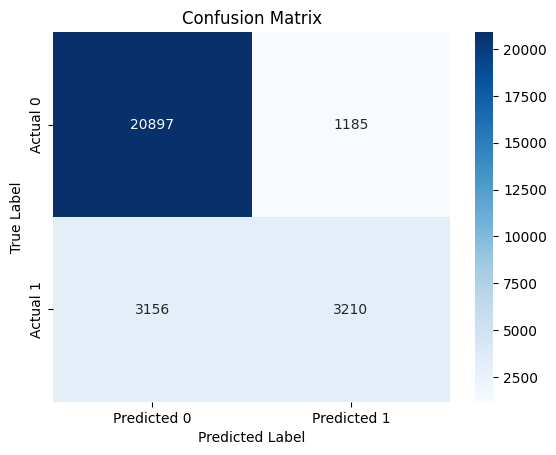

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample true labels and predicted labels
true_labels = y_test
predicted_labels = y_test_predictions

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Key Metrics Derived from the Confusion Matrix:

1. **Accuracy:**
-  The overall correctness of the model, calculated as (TP + TN) / (TP + TN + FP + FN).

2. **Precision (Positive Predictive Value):**
- The ability of the model to correctly identify positive instances among the instances predicted as positive, calculated as TP / (TP + FP).

3. **Recall (Sensitivity, True Positive Rate):**
- The ability of the model to correctly identify positive instances among all actual positive instances, calculated as TP / (TP + FN).

4. **Specificity (True Negative Rate):** 
- The ability of the model to correctly identify negative instances among all actual negative instances, calculated as TN / (TN + FP).

5. **F1 Score:**
- The harmonic mean of precision and recall, calculated as 2 * (Precision * Recall) / (Precision + Recall). Useful as it equally weights the unique metrics in Precision (FP) and Recall (FN).

The confusion matrix and derived metrics provide a comprehensive view of the model's performance, especially in binary classification tasks. They help evaluate the trade-offs between false positives and false negatives and provide insights into the strengths and weaknesses of the model.

It is worth noting the limitations of both precision and recall metrics and the relationship between the two. Precision is suceptible to making very few positive predictions, Recall is suceptible to making a very large number of positive predicitions. By taking both measures into account (F1 Score) we can get a more meaningful view of model performance.


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22082
         Yes       0.73      0.50      0.60      6366

    accuracy                           0.85     28448
   macro avg       0.80      0.73      0.75     28448
weighted avg       0.84      0.85      0.84     28448



#### ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation used in binary classification to assess the performance of a model. It illustrates the trade-off between the true positive rate (sensitivity or recall) and the false positive rate (1 - specificity) across different threshold values.

Based on a particular business case the ROC curve can be used to select a threshold value that meets a particular TPR or FPR. For example in disease detection we want to have very high TPR in order to not errornously miss any positive cases, in hiring new employees we may wish to have a very low FPR in order to ensure they are a good fit for the role.

The ROC curve can also be used to compare classifiers to identify which one is best for a particular use case.

In [53]:
model.predict_proba(X_test)

array([[0.80848074, 0.19151926],
       [0.74329568, 0.25670432],
       [0.78527706, 0.21472294],
       ...,
       [0.46182953, 0.53817047],
       [0.63963263, 0.36036737],
       [0.96747296, 0.03252704]])

In [54]:
# Select 1st column to get probabilities for class 1 (positive).
y_test_predictions = model.predict_proba(X_test)[:,1]

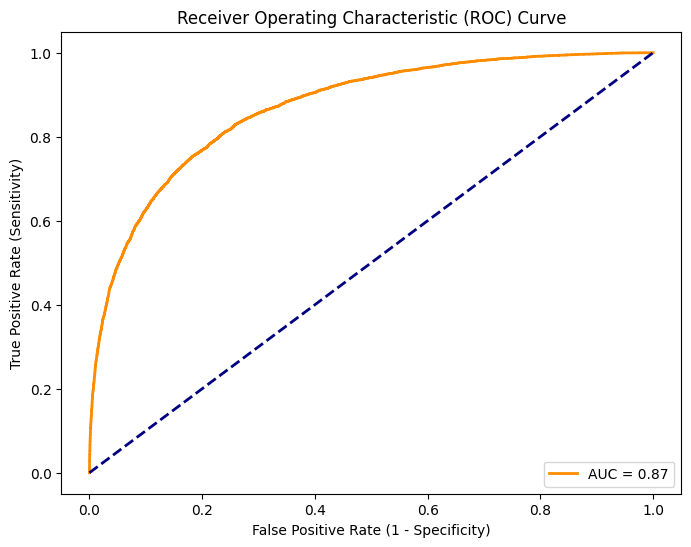

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_predictions, pos_label='Yes')

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_test_predictions)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

From the curve shown above we can see that our classifier is doing quite a good job as its AUC is 0.87 which is fairly close to the optimal score of 1.

## Hyperparameter Tuning <a id='s9'></a>

The final step in our study will be hyperparameter tuning as we have verified that our model is showing promising performance and now we wish to fine tune it so that it performs optimally. We do this by searching the parameter space to find the best combination of values.

#### Regularisation

Regularization in logistic regression is a technique that helps prevent overfitting by adding a penalty to the model's cost function. It comes in two primary forms: L1 (Lasso) and L2 (Ridge) regularization.

- **L1 Regularization (Lasso)** encourages sparsity by driving some coefficients to precisely zero, effectively performing feature selection.
- **L2 Regularization (Ridge)** penalizes large coefficients, shrinking them toward zero without setting them precisely to zero.

The regularization strength is controlled by the hyperparameter `C`, where smaller `C` values lead to stronger regularization, and larger `C` values result in weaker regularization. This parameter allows finding a balance between fitting the training data well and preventing overfitting.

Regularization is valuable when dealing with datasets with many features, correlated features, or limited training data. It helps build models that generalize better to new data by controlling complexity and reducing the risk of overfitting, ensuring the model learns meaningful patterns rather than noise or idiosyncrasies specific to the training set.


In [58]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}



grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [59]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8483


Parameters that give the best results : 

 {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


### Random Forest

Next we will construct a random forest classifier and compare it to our logistic regression model. 

In [58]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RF_model.score(X_test, y_test)

0.8550337457817773

In [57]:
# for n in [20,30,40,50,60,80,100]:
#     RF_model = RandomForestClassifier(n_estimators=n)
#     RF_model.fit(X_train, y_train)
#     print(f'n={n}, accuracy score: {RF_model.score(X_test, y_test)}')

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_classifier = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy of Best Model:", accuracy)